# Mobile Games Success And Failure EDA 

## Aditya Mani Tripathi (12017318)


* 1: Introduction
* 2: Data Sourcing
* 3: Data Cleaning And Processing
* 4: Exploratory Data Analysis 
    * XYZ
    * ABC
    * EFG
    * ZAB
   


## (1) Introduction
#### Predicting the success of a mobile game is a prime issue in game industry, During the pendemic period where most of the growth of game industry was tremendous and also we can say due to the rise in smartphone technology mobile games have            gained enormous popularity, More then thousands of games are being released each day, in which a few of them succeed while the majority fail.

### (1.1) Objective
#### To find out the factors behind the success of the mobile game 

### (2) Importing Libraries

In [63]:
#Importing the necessary library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from wordcloud import WordCloud 



### (3) Data Sourcing 

In [26]:
Data= pd.read_csv('appstore_games.csv')
Data.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


#### Getting the overview of data

In [27]:
print("The Dimension of the DataSet is: ",Data.shape)

The Dimension of the DataSet is:  (17007, 18)


In [28]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

### (4) Data Cleaning And Processing

* We will drop attributes like the Subtitle,ID,URL,Icon URL,Description because they are irrelevant to the success/failure of game. <br>
    However, they can be good candidates for our future work, So instead of dropping them in origianal dataset 
    we will create new <br> dataset which is copy of original and perform our cleaning operation. This will prevent the data loss also 

### (4.1) Creating copy of dataset

In [29]:
ndata= Data.copy()
ndata.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [30]:
# dropping the column ID, URL, Icon URL, Subtitle and Description 

ndata.drop(['ID','URL','Icon URL','Subtitle','Description'],axis=1, inplace= True)
ndata.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,Sudoku,4.0,3553.0,2.99,NaN,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,3.5,284.0,1.99,NaN,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,3.0,8376.0,0.00,NaN,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,Sudoku (Free),3.5,190394.0,0.00,NaN,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,Senet Deluxe,3.5,28.0,2.99,NaN,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


### (4.2)Now we will deal with the missing and null values 

In [31]:
# performing isnull with sum opertaion to get the number of null values in column 

ndata.isnull().sum()

Name                               0
Average User Rating             9446
User Rating Count               9446
Price                             24
In-app Purchases                9324
Developer                          0
Age Rating                         0
Languages                         60
Size                               1
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
dtype: int64

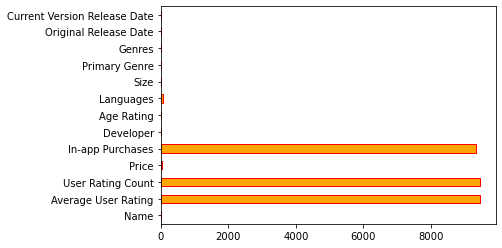

In [32]:
ndata.isna().sum().plot(kind="barh",color = 'orange', edgecolor= 'red')
plt.show()

#### 
* Here we can see that significant amount of NA values User rating count and Average User rating, This is quite obvious becaue most of the palyers do not give ratings to the games they just play 
* We can also see that significant amount of NA values for In-app purchase, this is also understandable because there are a lots of free games avaliable and people prefer free games a lot 

In [33]:
# we can see over 9446 games have null user rating so we will remove those rows 

ndata= ndata[pd.notnull(ndata['Average User Rating'])]

ndata.isnull().sum()


Name                               0
Average User Rating                0
User Rating Count                  0
Price                              0
In-app Purchases                2927
Developer                          0
Age Rating                         0
Languages                         24
Size                               0
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
dtype: int64

In [34]:
# Dealing with the Languages column 

ndata['Languages']

0        DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
1                                                       EN
2                                                       EN
3        DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
4        DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...
                               ...                        
16950                                               EN, ZH
16956                                                   EN
16962                                                   EN
16967                                                   EN
16993                                                   EN
Name: Languages, Length: 7561, dtype: object

In [35]:
# We can see that the English language constitutes the majority in the dataset and hence we can replace the Null Values with EN 

ndata['Languages'].fillna("EN", inplace= True)

ndata.isnull().sum()

Name                               0
Average User Rating                0
User Rating Count                  0
Price                              0
In-app Purchases                2927
Developer                          0
Age Rating                         0
Languages                          0
Size                               0
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
dtype: int64

In [36]:
ndata.head()

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,Sudoku,4.0,3553.0,2.99,NaN,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,3.5,284.0,1.99,NaN,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,3.0,8376.0,0.00,NaN,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,Sudoku (Free),3.5,190394.0,0.00,NaN,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,Senet Deluxe,3.5,28.0,2.99,NaN,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


## (5)Exploratory Data Analysis 

### (5.1) Univariate Analysis 

#### (5.1.1) Average User Rating

In [37]:
# Lets Start with Average User Rating
ndata["Average User Rating"]

0        4.0
1        3.5
2        3.0
3        3.5
4        3.5
        ... 
16950    3.0
16956    5.0
16962    5.0
16967    5.0
16993    5.0
Name: Average User Rating, Length: 7561, dtype: float64

In [38]:
# Counting the no of unique values 
ndata["Average User Rating"].nunique()

9

In [39]:
# Counting the frequency of each value
print(ndata["Average User Rating"].value_counts())

4.5    2861
4.0    1722
5.0     990
3.5     925
3.0     514
2.5     317
2.0     158
1.5      60
1.0      14
Name: Average User Rating, dtype: int64


In [40]:
ndata['Average User Rating'].value_counts(normalize=True)

4.5    0.378389
4.0    0.227748
5.0    0.130935
3.5    0.122338
3.0    0.067980
2.5    0.041926
2.0    0.020897
1.5    0.007935
1.0    0.001852
Name: Average User Rating, dtype: float64

#### Here We can see that the Average User rating Having value 1 and 1.5 is only 0.1852% and 0.7935% respectively which is very low if we compare to the rest of the values 

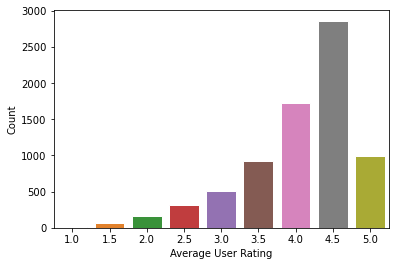

In [43]:
# plotting graph of distribution 
pl= sea.countplot(data = ndata, x ='Average User Rating', edgecolor= 'white')
pl.set_ylabel('Count')
pl.set_xlabel('Average User Rating')
plt.show()

#### Here we can see that there are very less numbers of games having less then 4 rating

[]

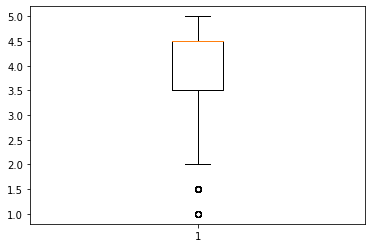

In [55]:
# Now Plotting Boxplot to detect the outlires 
plt.boxplot(ndata['Average User Rating'])
plt.plot()

#### Here we can see that most of the values lie between 4.5 to 3.5

#### (5.1.2) User Rating Count

<AxesSubplot:xlabel='User Rating Count', ylabel='Density'>

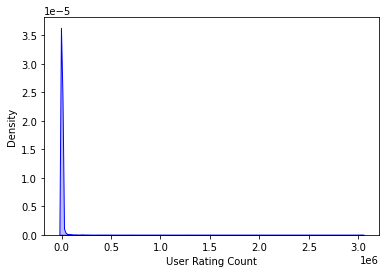

In [49]:
# ploting Ked graph with user rating count
sea.kdeplot(ndata['User Rating Count'],shade= True, color='b')

#### Here we can observe that user rating count is highly positive skewed  reason for this may be Inequality in Distribution

#### (5.1.3) Price

<AxesSubplot:xlabel='Price', ylabel='Density'>

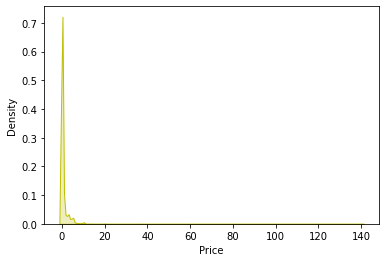

In [51]:
# ploting Ked graph with price
sea.kdeplot(ndata['Price'],shade= True, color='y')

#### Here we can see that most of the games are free of cost or less then 20 dollars 

### (5.1.4) Size

<AxesSubplot:xlabel='Size', ylabel='Density'>

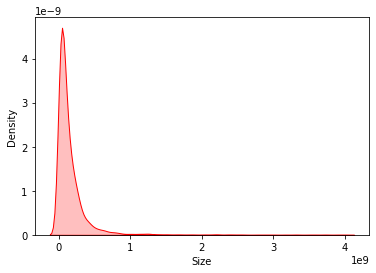

In [54]:
# ploting Ked graph with price
sea.kdeplot(ndata['Size'],shade= True, color='r')

#### Here we can observe that most of the games are in less then 1000MB

### (5.1.5) Developer

<AxesSubplot:>

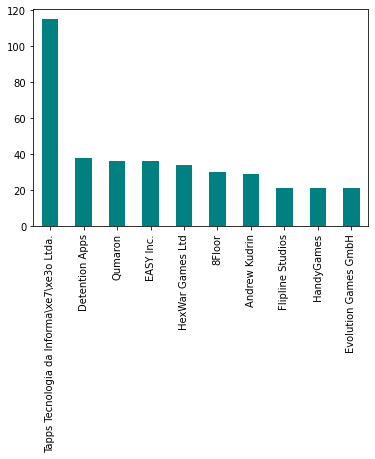

In [56]:
# Plotting Graph for top ten games developr 
ndata.Developer.value_counts()[:10].plot(kind='bar',color = 'teal')

#### 

### (5.1.6) Genres

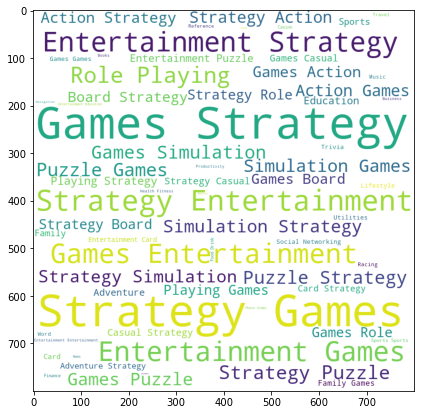

In [94]:
# Ploting wordcloud graph on Geners coloum
plt.figure(figsize=(7,7)) 
wordcloud = WordCloud(background_color='white',width=800, height=800).generate(' '.join(ndata['Genres'].dropna().astype(str)))
plt.imshow(wordcloud)


#### Here we can observe that the most of games released is comes under Strategy genre 

### (5.1.7) Age 

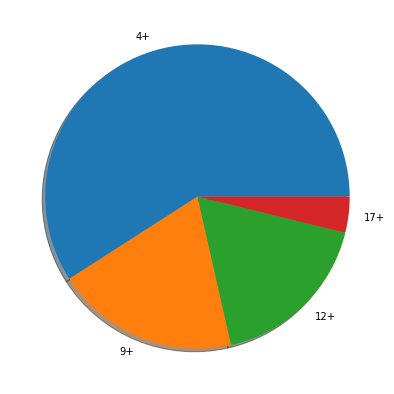

In [95]:
# PLoting pie chart for age section
plt.figure(figsize=(7,7))
plt.pie(ndata['Age Rating'].value_counts(),labels=ndata['Age Rating'].unique(), shadow = True)
plt.show()

#### Here we can observe that most of games are having age rating of 4+

## (5.2)Bivariate Analysis 

### (5.2.1) Average User Rating with price

In [107]:
# Ploting sactter plot between Average User Rating with price (Free and paid games)
paid = ndata[ndata['Price']>0]
free = ndata[ndata['Price']==0]

<AxesSubplot:xlabel='count', ylabel='Average User Rating'>

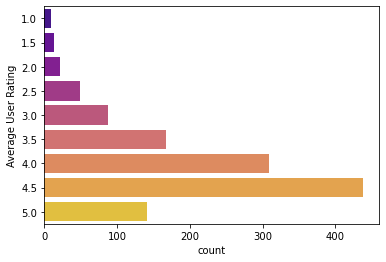

In [114]:
# for paid game 
sea.countplot(data=paid, y='Average User Rating', palette='plasma')

<AxesSubplot:xlabel='count', ylabel='Average User Rating'>

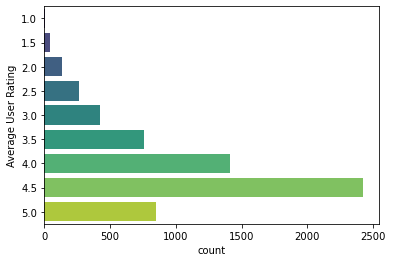

In [115]:
# for free game 
sea.countplot(data=free, y='Average User Rating', palette='viridis')

#### From Above graphs we can observe that free games have more downloads then the paid games, and its quite impressive that most of the games have good rating between 4 to 4.5, and its not effected that the game is paid or free

### (5.2.2)Date vs Price

In [116]:
ndata["Original Release Date"] = pd.to_datetime(ndata["Original Release Date"])
ndata["year"] = ndata["Original Release Date"].dt.year

<AxesSubplot:xlabel='Original Release Date', ylabel='Size'>

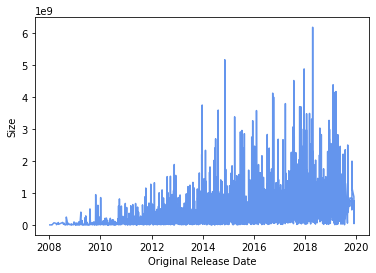

In [120]:
temp_df = ndata.groupby(['Original Release Date']).Size.sum().reset_index()
sea.lineplot(data = temp_df, x = 'Original Release Date', y = 'Size', color = 'cornflowerblue')

#### Here we can see that the size of the game is increasing over time

### Most Reviewed Game

In [130]:
ndata.sort_values(by='User Rating Count', ascending=False)[['Name', 'Price', 'Average User Rating', 'Size', 'User Rating Count']].head(10)

,Name,Price,Average User Rating,Size,User Rating Count
1378,Clash of Clans,0.0,4.5,1.612196e+08,3032734.0
7187,Clash Royale,0.0,4.5,1.451080e+08,1277095.0
13414,PUBG MOBILE,0.0,4.5,2.384082e+09,711409.0
1921,Plants vs. Zombies\u2122 2,0.0,4.5,1.207634e+08,469562.0
8139,Pok\xe9mon GO,0.0,3.5,2.815212e+08,439776.0
2410,Boom Beach,0.0,4.5,2.027858e+08,400787.0
12473,"Cash, Inc. Fame & Fortune Game",0.0,5.0,2.459576e+08,374772.0
8632,Idle Miner Tycoon: Cash Empire,0.0,4.5,4.439747e+08,283035.0
38,TapDefense,0.0,3.5,7.774384e+06,273687.0
3550,Star Wars\u2122: Commander,0.0,4.5,1.230838e+08,259030.0


### Most Expensive Game

In [131]:
ndata.sort_values(by='Price', ascending=False)[['Name', 'Price', 'Average User Rating', 'Size', 'User Rating Count']].head(10)

,Name,Price,Average User Rating,Size,User Rating Count
2634,Finabase: realtime stocks,139.99,4.5,1.333432e+08,1099.0
15031,GOTO Bridge 19,59.99,4.0,4.225659e+08,50.0
14093,Chess Openings Wizard,36.99,4.0,1.881170e+08,9.0
4885,"Warhammer 40,000: Armageddon",19.99,4.0,1.268191e+09,72.0
276,SmartGo Kifu,19.99,4.5,6.420787e+07,227.0
4609,Battle Academy 2: Eastern Front,19.99,4.0,5.954601e+08,83.0
3898,Commander the Great War,19.99,3.5,4.084531e+08,98.0
2863,Panzer Corps,19.99,4.5,1.526937e+09,249.0
9843,CrazyStone DeepLearning Pro,16.99,4.0,5.377741e+07,16.0
6952,Star Hammer: The Vanguard Prophecy,14.99,4.0,2.762209e+08,28.0


### Statistical analysis

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


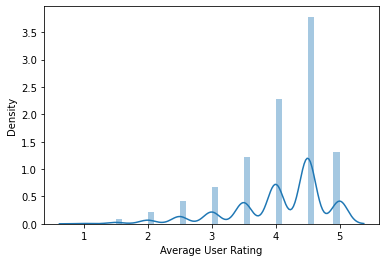

In [133]:
sea.distplot(ndata['Average User Rating'])
plt.show()

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


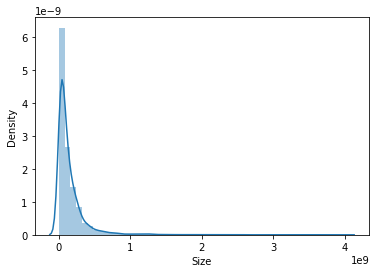

In [134]:
sea.distplot(ndata['Size'])
plt.show()

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


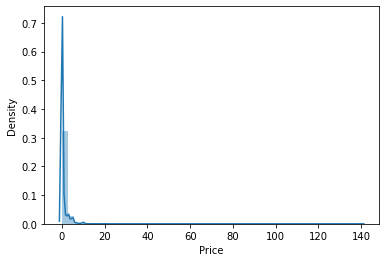

In [135]:
sea.distplot(ndata['Price'])
plt.show()

C:\Users\adity\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


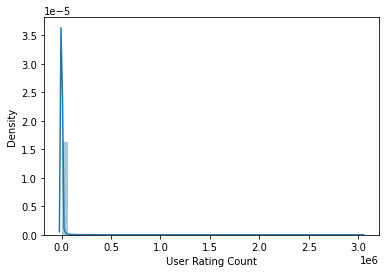

In [143]:
sea.distplot(ndata['User Rating Count'])
plt.show()

In [142]:
ndata.describe()

,Average User Rating,User Rating Count,Price,Size,year
count,7561.000000,7.561000e+03,7561.000000,7.561000e+03,7561.000000
mean,4.060905,3.306531e+03,0.571305,1.514679e+08,2014.856236
std,0.751428,4.232256e+04,2.415658,2.550380e+08,2.610184
min,1.000000,5.000000e+00,0.000000,2.158400e+05,2008.000000
25%,3.500000,1.200000e+01,0.000000,3.061862e+07,2013.000000
50%,4.500000,4.600000e+01,0.000000,7.964672e+07,2015.000000
75%,4.500000,3.090000e+02,0.000000,1.776138e+08,2017.000000
max,5.000000,3.032734e+06,139.990000,4.005591e+09,2019.000000
